In [1]:
import yfinance as yf
import pandas as pd
tesla = yf.Ticker("TSLA")
tesla

yfinance.Ticker object <TSLA>

In [6]:
tesla_data = tesla.history(period = "Max")
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [4]:
tesla_data.reset_index(inplace=True)
tesla_data.head

<bound method NDFrame.head of       index       Date        Open        High         Low       Close  \
0         0 2010-06-29    1.266667    1.666667    1.169333    1.592667   
1         1 2010-06-30    1.719333    2.028000    1.553333    1.588667   
2         2 2010-07-01    1.666667    1.728000    1.351333    1.464000   
3         3 2010-07-02    1.533333    1.540000    1.247333    1.280000   
4         4 2010-07-06    1.333333    1.333333    1.055333    1.074000   
...     ...        ...         ...         ...         ...         ...   
3061   3061 2022-08-25  302.359985  302.959991  291.600006  296.070007   
3062   3062 2022-08-26  297.429993  302.000000  287.470001  288.089996   
3063   3063 2022-08-29  282.829987  287.739990  280.700012  284.820007   
3064   3064 2022-08-30  287.869995  288.480011  272.649994  277.700012   
3065   3065 2022-08-31  280.619995  281.250000  271.809998  275.609985   

         Volume  Dividends  Stock Splits  
0     281494500          0           0

In [8]:
import requests

response = requests.get(url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue")
data = response.text

In [39]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(data,"html5lib")

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    tesla_revenue = tesla_revenue.append({"Date":date,"Revenue":revenue}, ignore_index = True)
    
tesla_revenue.tail()

,Date,Revenue
11,2009,"$8,806"
12,2008,"$7,094"
13,2007,"$5,319"
14,2006,"$3,092"
15,2005,"$1,843"


In [13]:
gme = yf.Ticker("GME")

In [15]:
gme_data = gme.history(period = "Max")
gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14,1.712707,1.716073,1.670625,1.683250,11021600,0.0,0.0
2002-02-15,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
2002-02-20,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [17]:
gme_url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [27]:
import requests

response = requests.get(url = gme_url)
data = response.text

In [29]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(data,"html5lib")

soup.find("tr")

<tr>
					<th colspan="2" style="text-align:center">GameStop Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
				  </tr>

In [31]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(data,"html5lib")

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0]
    revenue = col[1]
    
    gme_revenue = gme_revenue.append({"Date":date,"Revenue":revenue}, ignore_index = True)
    
gme_revenue.tail()

,Date,Revenue
11,[2009],"[$8,806]"
12,[2008],"[$7,094]"
13,[2007],"[$5,319]"
14,[2006],"[$3,092]"
15,[2005],"[$1,843]"


In [51]:
tesla_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [52]:
pip install plotly

^C
Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:title={'center':'Tesla Stock Data'}, xlabel='Date'>

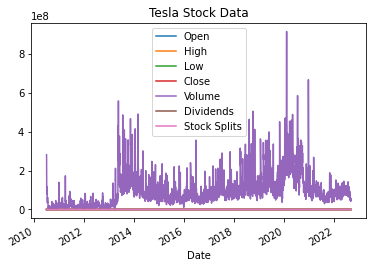

In [64]:
tesla_data.plot(title ="Tesla Stock Data")

<AxesSubplot:title={'center':'GME Stock Data'}, xlabel='Date'>

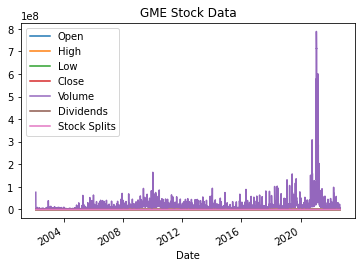

In [62]:
gme_data.plot(title ="GME Stock Data")